# 标签

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

`legend()` 函数被用来添加图像的标签，其主要相关的属性有：

- legend entry - 一个 legend 包含一个或多个 entry，一个 entry 对应一个 key 和一个 label 
- legend key - marker 的标记
- legend label - key 的说明
- legend handle - 一个 entry 在图上对应的对象

## 使用 legend

调用 `legend()` 会自动获取当前的 `Axes` 对象，并且得到这些 handles 和 labels，相当于：

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

我们可以在函数中指定 `handles` 的参数：

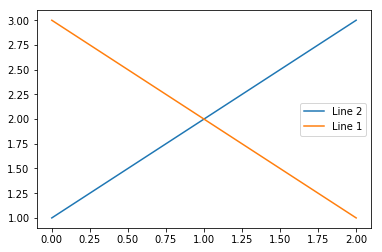

In [2]:
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend(handles=[line_up, line_down])
plt.show()

可以将 labels 作为参数输入 `legend` 函数：

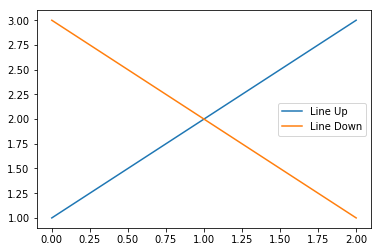

In [3]:
line_up, = plt.plot([1,2,3])
line_down, =plt.plot([3,2,1])
plt.legend([line_up, line_down],['Line Up', 'Line Down'])
plt.show()

# 产生特殊形状的marker key

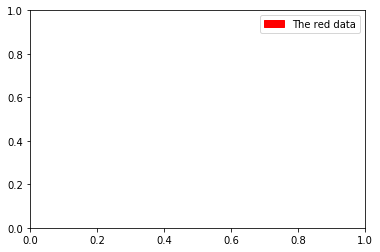

In [5]:
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])
plt.show()

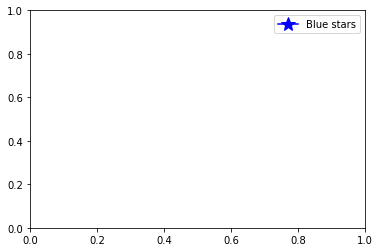

In [6]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
blue_line=mlines.Line2D([],[],color='blue',marker='*',
                       markersize=15, label='Blue stars')
plt.legend(handles=[blue_line])
plt.show()

# 指定legend的位置

`bbox_to_anchor` 关键词可以指定 `legend` 放置的位置，例如放到图像的右上角：

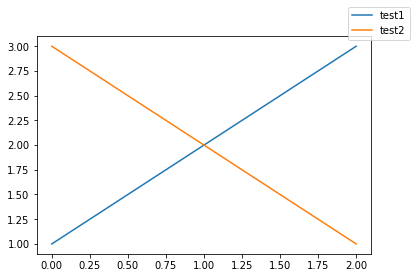

In [7]:
plt.plot([1,2,3],label='test1')
plt.plot([3,2,1],label='test2')
plt.legend(bbox_to_anchor=(1,1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

更复杂的用法：

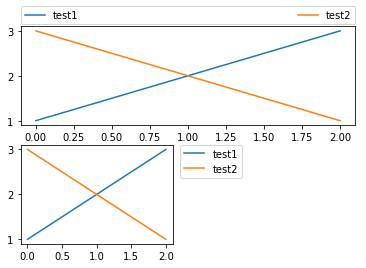

In [10]:
plt.subplot(211)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend above this legend, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend to the right of this smaller figure.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

# 同一个Axes中的多个legend

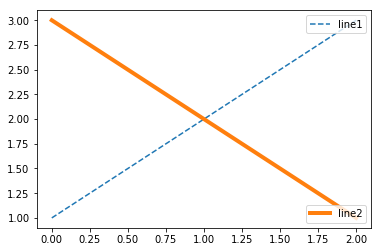

In [12]:
line1, = plt.plot([1,2,3], label="line1", linestyle='--')
line2, = plt.plot([3,2,1], label="line2", linewidth=4)

#create a lengend for the first line
first_legend = plt.legend(handles=[line1], loc=1)
#Add the legend manually to the current Axes
ax=plt.gca().add_artist(first_legend)
#create another legend for the second line
plt.legend(handles=[line2], loc=4)
plt.show()

其中 `loc` 参数可以取 0-10 或者 字符串，表示放置的位置：

loc string | loc code
---|---
`'best'  `|          0
`'upper right' `   | 1
`'upper left'  `    |2
`'lower left'  `    |3
`'lower right' `    |4
`'right'       `   | 5
`'center left' `    |6
`'center right'`   | 7
`'lower center'`  |  8
`'upper center'` |   9
`'center'`          |10

# 更多用法

多个 `handle` 可以通过括号组合在一个 entry 中：

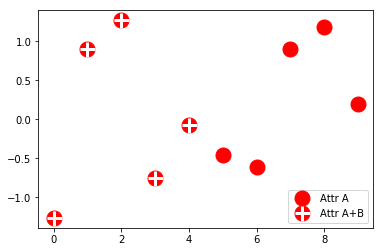

In [13]:
from numpy.random import randn

z = randn(10)

red_dot, = plt.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
white_cross, = plt.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

plt.show()

椭圆：

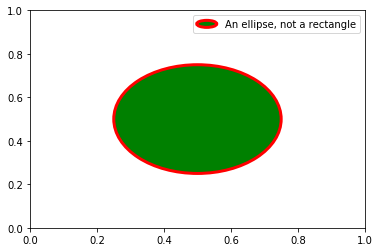

In [15]:
from matplotlib.legend_handler import HandlerPatch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]


c = mpatches.Circle((0.5, 0.5), 0.25, facecolor="green",
                    edgecolor="red", linewidth=3)
plt.gca().add_patch(c)

plt.legend([c], ["An ellipse, not a rectangle"],
           handler_map={mpatches.Circle: HandlerEllipse()})

plt.show()